### Visualizing time series data

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [4]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Downloading the time series data from Yahoo-Finance

df = yf.download('MSFT', auto_adjust =False, progress=False)

#Locating column name 'Adj Close'
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [6]:
# Calculating simple and log returns
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

# Dropping all redundant variables
df.dropna(how='any', inplace=True)

## Ploting the Graph

1. Using the plt pandas method

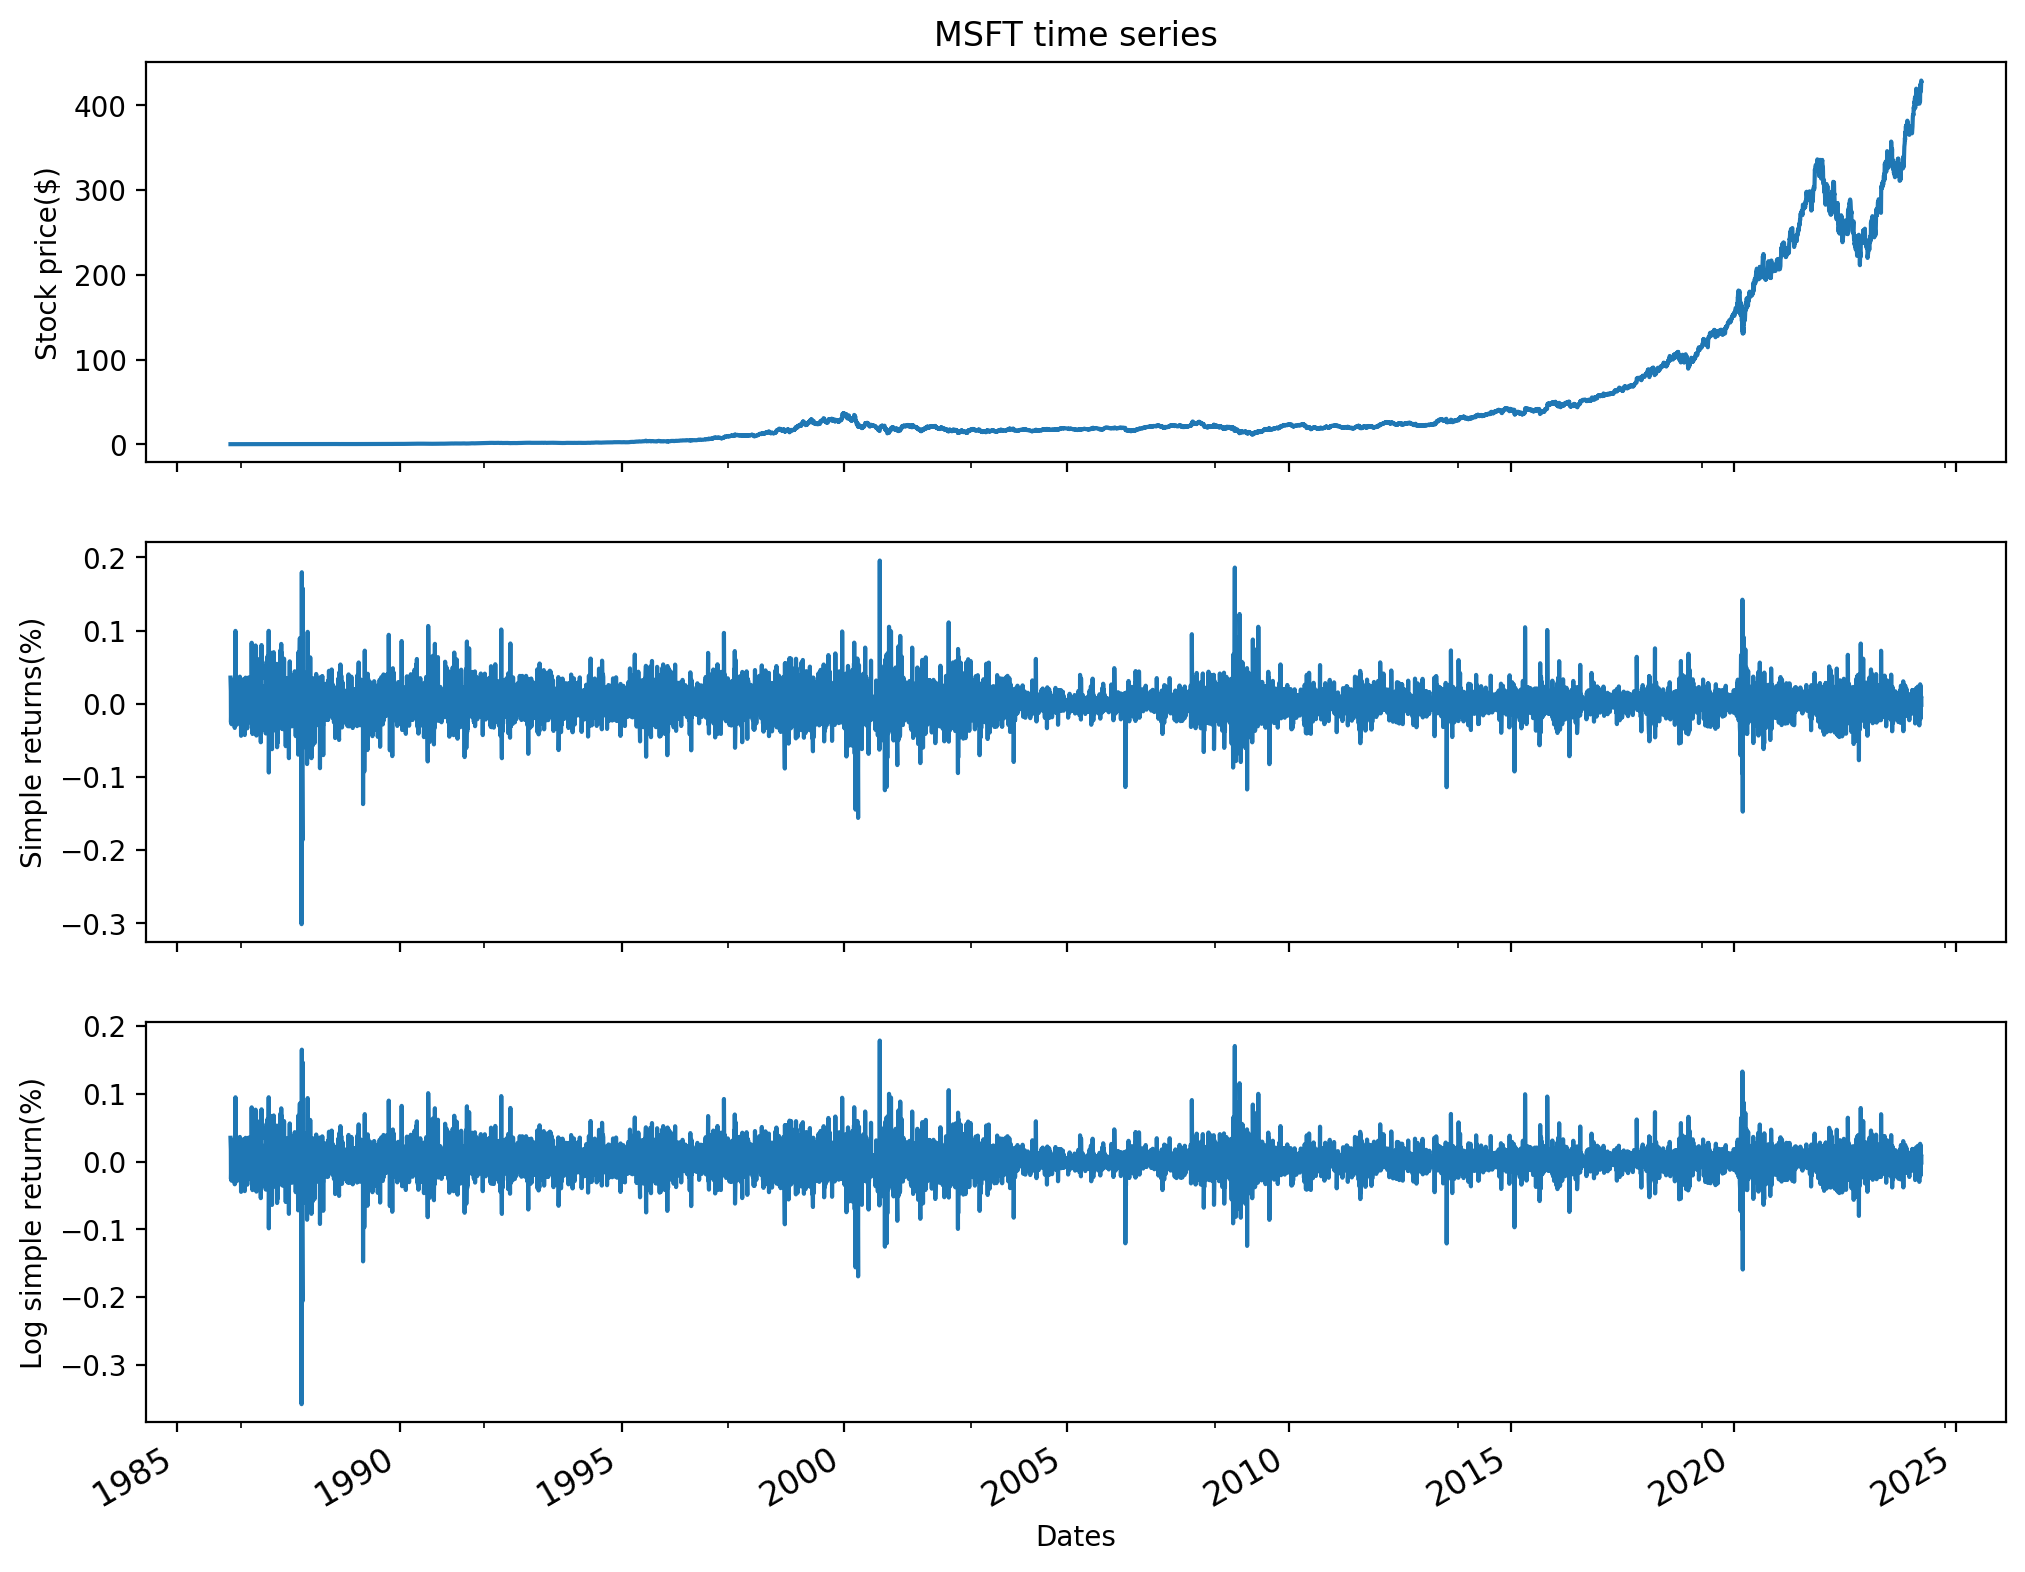

In [7]:
fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

#adding Prices
df.adj_close.plot(ax=ax[0])
ax[0].set(title='MSFT time series',
         ylabel='Stock price($)')

#Adding simple return
df.simple_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Simple returns(%)')

#adding log return
df.log_rtn.plot(ax=ax[2])
ax[2].set(xlabel='Dates',
          ylabel='Log simple return(%)')

ax[2].tick_params(axis='x',
                  which ='major',
                  labelsize  = 12)

# plt.tight_layout
plt.show()

## Using Plotly + Cufflinks

1. Import the libraries and handle the settings:

In [10]:
pip install cufflinks

     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.7 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.7 kB ? eta -:--:--
     -------------- ----------------------- 30.7/81.7 kB 217.9 kB/s eta 0:00:01
     -------------- ----------------------- 30.7/81.7 kB 217.9 kB/s eta 0:00:01
     -------------- ----------------------- 30.7/81.7 kB 217.9 kB/s eta 0:00:01
     -------------- ----------------------- 30.7/81.7 kB 217.9 kB/s eta 0:00:01
     -------------- ----------------------- 30.7/81.7 kB 217.9 kB/s eta 0:00:01
     -------------- ----------------------- 30.7/81.7 kB 217.9 kB/s eta 0:00:01
     -------------- ----------------------- 30.7/81.7 kB 217.9 kB/s eta 0:00:01
     -------------- ----------------------- 30.7/81.7 kB 217.9 kB/s eta 0:00:01
     -------------- ----------------------- 30.7/81.7 kB 217.9 kB/s eta 0:00:01
     -------------- ----------------------- 30.7/81.7 kB 217.9

In [8]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

# set up settings (run it once)
# cf.set_config_file(world_readable=True, theme='pearl',  offline=True)

# initialize notebook display
init_notebook_mode()

In [9]:
cf.set_config_file(world_readable=True, theme='pearl',offline=True)
df.iplot(subplots=True, shape=(3,1), shared_xaxes=True, title='MSFT time series')